### 0. Environment Setup

In [9]:
import warnings
warnings.filterwarnings("ignore")

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### 1. Data Preparation

In [2]:
import data.data_loader as loader

# loader.store_data()

In [3]:
data = loader.data_preprocess()
data.head()

,tags,a_id,q_id,date,link,title,body,view_count,answer,cleaned_text,cleaned_title
77994129,"['nlp', 'label-studio']",NaN,77994129,1707912001,https://stackoverflow.com/questions/77994129/h...,How can I use label studio to annotate text da...,<p>How can I use label studio to annotate text...,725,NaN,use label studio annotate text datum google co...,use label studio annotate text datum google colab
75709831,"['python', 'deep-learning', 'pytorch', 'nlp', ...",NaN,75709831,1678572297,https://stackoverflow.com/questions/75709831/z...,Zero Accuracy in Sentiment Analysis FFNN Model...,<p>I'm constructing a feedforward neural net (...,125,NaN,zero accuracy sentiment analysis ffnn model py...,zero accuracy sentiment analysis ffnn model py...
79485259,"['python', 'nlp', 'spacy']",NaN,79485259,1741138463,https://stackoverflow.com/questions/79485259/s...,Spacy rules matching entities before text,<p>I'm trying to write a spacy parser to extra...,29,NaN,spacy rule match entity text try write spacy p...,spacy rule match entity text
79501178,"['python', 'nlp', 'large-language-model']",79501337.0,79501178,1741704631,https://stackoverflow.com/questions/79501178/s...,Store images instead of showing in a server,<p>I am running the code found on this <a href...,35,<p>I can't test it but ...</p>\n<p>I checked <...,store image instead show server run code find ...,store image instead show server
79548202,"['nlp', 'huggingface-transformers', 'pre-train...",79551169.0,79548202,1743499277,https://stackoverflow.com/questions/79548202/g...,GPT-2 and other models from huggingface -100 l...,<p>I understand the -100 label id is used so t...,43,<p>The author of the tutorial you mentioned se...,model huggingface label index training instead...,model huggingface label index training instead...


### 3. Graphic Representation of the datasets

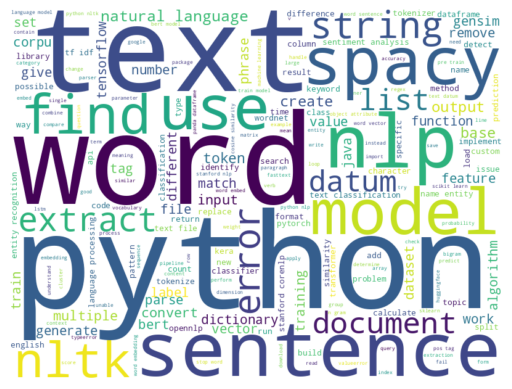

In [19]:
import data.data_analysis as analysis

analysis.word_cloud_for_title(data)

In [21]:
sorted_terms = analysis.sort_by_idf_for_title(data)
print(sorted_terms[:5])

[('word', 2.9940480586124103), ('text', 3.1078910149515755), ('python', 3.194229217900301), ('model', 3.3336098960435177), ('nlp', 3.540257964323131)]


In [22]:
custom_stop_words = []
for term, score in sorted_terms:
    if score <= 4.5:
        custom_stop_words.append(term)

print(custom_stop_words)

['word', 'text', 'python', 'model', 'nlp', 'sentence', 'spacy', 'nltk', 'extract', 'language', 'string', 'use', 'error', 'find', 'list', 'datum', 'file', 'train']


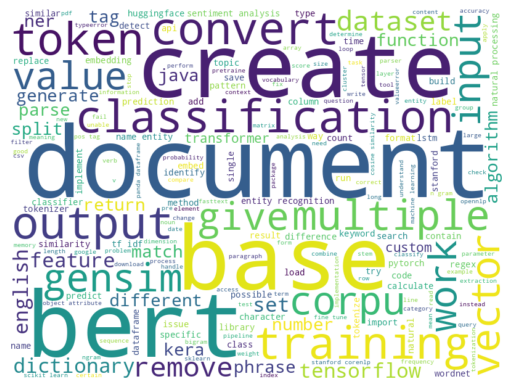

In [23]:
analysis.word_removal_for_title(data, custom_stop_words)

analysis.word_cloud_for_title(data)

### 4. Posts Caterogisation


##### **Topic Modelling - Latent Dirichlet Allocation (LDA)**

In [7]:
import model.cluster_model as cluster

top_words_in_topic = cluster.lda_with_count_vectors(data, topics=15, topk=5)

for idx, top_words in enumerate(top_words_in_topic):
    print(f"Topic {idx}: {', '.join(top_words)}")

Topic 0: nltk, sentence, pos, tag, word
Topic 1: text, line, datum, label, file
Topic 2: gram, vector, similarity, document, feature
Topic 3: dataset, datum, training, train, model
Topic 4: face, huggingface, fine, tokenizer, model
Topic 5: use, text, user, api, question
Topic 6: extract, word, frequency, count, text
Topic 7: embed, vector, input, model, word
Topic 8: want, like, string, list, word
Topic 9: extract, ner, name, spacy, entity
Topic 10: file, dataframe, datum, column, text
Topic 11: matrix, gensim, term, topic, document
Topic 12: noun, stanford, parse, language, sentence
Topic 13: get, run, code, try, error
Topic 14: good, like, text, sentence, word


The LDA with count vector gives us the top five words of each topic as we think displaying the top 5 would be informative enough in providing high-level thematic insights. Since LDA gives different results every time we run, a random seed = 42 is set to ensure the reproducibility of results. For example, words in topic 10 (e.g. file, dataframe, datum, column, text) may be issues related to data reading and formatting. Also, wordings in topic 0 and 9 (e.g. nltk, pos, spacy, ner, entity) are common terms we see in data preprocessing stage. Further, words in topic 3 and 13 (e.g. training, train, try, error) are terms we usually see in Model Training and Testing stage. To conclude, the LDA using bad-of-words model provide certain level of evidence to support the categorisation design of ours.

In [24]:
top_words_in_topic = cluster.lda_with_tfidf_vectors(data, topics=15, topk=5)

for idx, top_words in enumerate(top_words_in_topic):
    print(f"Topic {idx}: {', '.join(top_words)}")

Topic 0: install, attributeerror, attribute, import, error
Topic 1: bertopic, lda, coherence, mallet, topic
Topic 2: deberta, smooth, deeppavlov, freqdist, bleu
Topic 3: sgd, acc, singularize, automodelforsequenceclassification, elmo
Topic 4: adapter, dynet, biobert, scispacy, bla
Topic 5: model, run, try, file, error
Topic 6: vbd, dt, jj, nnp, nn
Topic 7: bert, datum, error, train, model
Topic 8: like, list, sentence, text, word
Topic 9: noun, stanford, tag, sentence, entity
Topic 10: hunspell, chocolate, roc, codec, sentiwordnet
Topic 11: tp, tflearn, fn, fp, nmf
Topic 12: onnx, audio, triple, bengali, predicate
Topic 13: seller, deepspeech, synonymous, jwnl, verbnet
Topic 14: senna, subtree, abstractive, meteor, rouge


LDA with TF-IDF does not work well for providing insights on categorization. The TF-IDF weighting tends to emphasize on rare words that might be mispelled and not carrying any useful information, which result in several noisy and fragmented topics (e.g. topic 3 and 6). The topics and wordings are not providing meaningful insights compared to the bag-of-word approach.

##### **Document Clustering - K-means Clustering**


In [29]:
top_words_in_cluster = cluster.kmeans_with_tfidf_vectors(data, clusters=15, topk=5)     
        
for idx, top_terms in enumerate(top_words_in_cluster):
    print(f"Cluster {idx}: {', '.join(top_terms)}")

Cluster 0: remove, word, stopword, stop, punctuation
Cluster 1: model, train, layer, bert, training
Cluster 2: datum, feature, label, sentiment, text
Cluster 3: error, code, try, get, run
Cluster 4: column, dataframe, row, panda, text
Cluster 5: spacy, entity, ner, name, model
Cluster 6: word, vector, like, find, text
Cluster 7: language, natural, processing, english, text
Cluster 8: text, like, use, want, nlp
Cluster 9: idf, tf, document, word, value
Cluster 10: document, similarity, term, word, vector
Cluster 11: list, word, string, like, python
Cluster 12: topic, lda, document, model, modeling
Cluster 13: file, text, line, code, python
Cluster 14: sentence, word, like, text, want


The result present distinct clusters clearly grouping related terms. For instance, clusters related to formatting (e.g. "column, dataframe, row, panda, text"), preprocessing (e.g. "tag, pos, tagger, word, nltk" and "entity, name, ner, spacy, recognition"), feature engineering (e.g. "vector, embed, word, embedding, layer") and model training ("model, train, training, bert, datum" and "sentiment, analysis, negative, positive, review") provide non-overlapping thematic insights to support the categorization pipeline.

In [8]:
top_words_in_cluster = cluster.kmeans_with_word2vec(data, clusters=15, topk=5)
 
for i, tokens_per_cluster in enumerate(top_words_in_cluster):
    print(f"Cluster {i}: {', '.join(tokens_per_cluster)}")

Cluster 0: setence, ruler, biomedical, ner, recogniser
Cluster 1: elmo, backpropagate, fitting, flatten, logit
Cluster 2: unseen, embeding, unlabeled, xgboost, smo
Cluster 3: meaningful, essentially, aka, preset, phonetically
Cluster 4: parsed, lemmas, programmatically, morpheme, tagged
Cluster 5: passage, precisely, diverse, subtext, nonsense
Cluster 6: compile, successfully, execute, import, cmd
Cluster 7: essentially, corresponding, suppose, counter, associative
Cluster 8: seperate, hyphenate, jumble, mwe, put
Cluster 9: model, embeding, finetune, llama, fastai
Cluster 10: align, embeding, embedding, vector, glove
Cluster 11: paraphrase, ruby, hebrew, wordninja, gujarati
Cluster 12: seperate, df, dataframe, column, pretend
Cluster 13: unpickle, rerun, excerpt, attempt, everytime
Cluster 14: centroid, vectorizing, vectorise, frequence, weightage


The k-means clustering with Word2Vec results show several clusters with ambiguous, unrelated or mixed terms. This is most likely due to the averaging of word embeddings to form document vectors, which dilutes the contextual and semantic signals. These wordings especially adjectives do not directly map to the proposed categorisation pipeline stages. The inconsistency makes it difficult to use the clusters result as a basis for categorisation. 

##### **Topic Labelling - BERTopic**

In [10]:
# create and fit BERTopic model and set the grouping of topics into 15 clusters
topics, topic_info = cluster.get_bert_topic(data['cleaned_text'], n=15)
topic_info

,Topic,Count,Name,Representation,Representative_Docs
0,-1,9567,-1_word_text_model_sentence,"[word, text, model, sentence, like, try, use, ...",[fine tune huggingface model dataset hub want ...
1,0,6684,0_word_text_sentence_like,"[word, text, sentence, like, want, try, find, ...",[nltk language modeling confusion want train l...
2,1,2024,1_model_bert_train_word,"[model, bert, train, word, vector, embed, trai...",[add miss word vector pre train model gensim l...
3,2,845,2_error_model_try_code,"[error, model, try, code, get, gpu, run, follo...",[typeerror list get get error run exact code f...
4,3,184,3_install_spacy_error_import,"[install, spacy, error, import, instal, try, m...",[try install spacy mac pip code work try run c...
5,4,144,4_spark_pyspark_error_dataframe,"[spark, pyspark, error, dataframe, column, tex...",[spark nlp method error bert zero shot classif...
6,5,113,5_tweet_emoji_twitter_sentiment,"[tweet, emoji, twitter, sentiment, analysis, p...",[accurate twitter sentiment analysis solution ...
7,6,107,6_opennlp_uima_model_annotation,"[opennlp, uima, model, annotation, train, use,...",[self train ner model incompatible version ope...
8,7,103,7_memory_process_time_run,"[memory, process, time, run, file, python, cod...",[checklist spacy optimization try understand s...
9,8,84,8_api_google_cloud_error,"[api, google, cloud, error, openai, language, ...",[request insufficient authentication scope mak...


The BERTopic results inspired a task-based and keyword-based for our sub-categories. For example, a topic with “column, dataframe, row, panda, text” directly inspired the sub-categories of data extraction and format conversion under Data Reading and Formatting stage. Similarly, a topic featuring “parser, pos, tag, nltk” inspired our Data Preprocessing sub-categories by emphasizing tokenization and linguistic analysis. Moreover, clusters showing terms like “tfidf, matrix, term, document” and “vector, embed, similarity” validated our Feature Engineering sub-categories, while topics with “model, train, bert” informed our Model Training/Testing and "perplexity, bleu, calculate, precision" informed Performance Evaluation sub-categories. These focused clusters clearly reflect real-world issues, providing solid, data-driven inspiration for our task-based categorization pipeline.

Topic -1 is usually assumed to be irrelevant as they cannot clearly fit into any of the main topic clusters. Yet, the large number of count of topic -1, 0, 1 may potentially mask hidden sub-themes. Thus a more detailed investigation on these three topics will be performed using BERTopic to see if more insights can be obtained.

In [ ]:
# dig deeper into topic -1 (outliers group)

# extract documents that were assigned to topic -1
subset_negative_1 = [doc for doc, topic in zip(data['cleaned_text'], topics) if topic == -1]

# create new BERTopic model to analyse the group and set the grouping of topics to 10 clusters
subset_topics_negative_1, subset_topic_info_negative_1 = cluster.get_bert_topic(subset_negative_1, n=10)
subset_topic_info_negative_1

,Topic,Count,Name,Representation,Representative_Docs
0,-1,6109,-1_word_text_model_sentence,"[word, text, model, sentence, try, like, code,...",[update fine tune model train model dataset tr...
1,0,2549,0_word_sentence_model_text,"[word, sentence, model, text, like, use, want,...",[keras sequence classification python try perf...
2,1,240,1_column_dataframe_row_word,"[column, dataframe, row, word, text, datum, pa...",[create data frame text file text file line fi...
3,2,213,2_error_try_code_model,"[error, try, code, model, memory, run, file, b...",[solve sklearn memory error fitting large datu...
4,3,164,3_error_install_instal_run,"[error, install, instal, run, try, import, mod...",[give output false code give follow error try ...
5,4,161,4_spacy_error_pipeline_try,"[spacy, error, pipeline, try, code, version, i...",[python nlp spacy oserror find model de instal...
6,5,56,5_word_file_chinese_persian,"[word, file, chinese, persian, english, charac...",[count word different class separately text fi...
7,6,44,6_stanford_corenlp_memory_pos,"[stanford, corenlp, memory, pos, coreference, ...",[stanford corenlp try stanford corenlp code we...
8,7,19,7_download_file_line_model,"[download, file, line, model, spacy, load, con...",[programmatically download large file dropbox ...
9,8,12,8_transformer_huggingface_model_optimizer,"[transformer, huggingface, model, optimizer, t...",[huggingface transformer get message non defau...


Some of the topics after zooming into the outlier group -1 are similar to the main BERTopic analysis. The topics in the group contain mix of generic and noisy terms that do not deliver clear and coherant themes that give inspirations to the sub-categories. To conclude, the overall BERTopic analysis of this group do not provide valuable insights.

In [ ]:
# Dig deeper into Topic 0 (Topic 0 here is the one from the overall BERT).

# extract documents that were assigned to topic 0
subset_0 = [doc for doc, topic in zip(data['cleaned_text'], topics) if topic == 0]

# create new BERTopic model to analyse the group and set the grouping of topics to 10 clusters
subset_topics_0, subset_topic_info_0 = cluster.get_bert_topic(subset_0, n=10)
subset_topic_info_0

,Topic,Count,Name,Representation,Representative_Docs
0,-1,386,-1_text_word_sentence_university,"[text, word, sentence, university, like, extra...",[index substre original text work natural lang...
1,0,3339,0_word_sentence_like_text,"[word, sentence, like, text, try, example, wan...",[python way nlp library combine word state pos...
2,1,1078,1_similarity_topic_document_cluster,"[similarity, topic, document, cluster, word, c...",[use cosine similarity read paper think unders...
3,2,750,2_column_dataframe_list_word,"[column, dataframe, list, word, row, remove, t...",[compare row panda datum frame panda df column...
4,3,636,3_intent_language_chatbot_bot,"[intent, language, chatbot, bot, user, like, e...",[intent chatbot numeric string datum try build...
5,4,186,4_url_address_scrape_extract,"[url, address, scrape, extract, html, page, te...",[web scrape text unstructured webpage beautifu...
6,5,151,5_pdf_extract_text_file,"[pdf, extract, text, file, table, page, docume...",[read table image pdf nlp tool nlp assignment ...
7,6,83,6_lucene_search_elasticsearch_index,"[lucene, search, elasticsearch, index, query, ...",[approach suggestiosn classify keyword search ...
8,7,44,7_plot_word_frequency_graph,"[plot, word, frequency, graph, axis, like, dat...",[plot word topic stm possible plot word topic ...
9,8,31,8_perplexity_bleu_score_calculate,"[perplexity, bleu, score, calculate, model, to...",[perplexity token average perplexity perplexit...


The dive into the topic 0 of the entire BERtopic analysis gives a bit of interesting insights of the sub-categories design and support of the structure of the categorisation pipeline. The topic 2 ("spacy, ner") is clearly something in data preprocessing stage and NER can be regarded as a task-based or keywords-based sub-category. In addition, wordings in topic 5 ("regex, match") gives inspiration of creating one sub-category under data preprocessing of Regex. Topic 7 wordings are something we can address using lemmatization/stemming sub-category, supporting the necessity of this sub-category.

In [17]:
# Dig deeper into Topic 1 (Topic 1 here is the one from the overall BERT).

# extract documents that were assigned to topic 0
subset_1 = [doc for doc, topic in zip(data['cleaned_text'], topics) if topic == 1]

# create new BERTopic model to analyse the group and set the grouping of topics to 10 clusters
subset_topics_1, subset_topic_info_1 = cluster.get_bert_topic(subset_1, n=10)
subset_topic_info_1

,Topic,Count,Name,Representation,Representative_Docs
0,-1,143,-1_model_layer_embed_word,"[model, layer, embed, word, sentence, loss, em...",[export embed matrix word tensorflow code vari...
1,0,513,0_bert_model_sentence_error,"[bert, model, sentence, error, fine, use, try,...",[way use bert large text classification tool f...
2,1,462,1_model_spacy_train_training,"[model, spacy, train, training, ner, entity, d...",[create custom ner spacy want train additional...
3,2,412,2_document_idf_feature_text,"[document, idf, feature, text, tf, classifier,...",[tf idf value add find document similarity wor...
4,3,340,3_word_vector_embed_embedding,"[word, vector, embed, embedding, glove, model,...",[add miss word vector pre train model gensim l...
5,4,55,4_model_save_hug_train,"[model, save, hug, train, face, checkpoint, tr...",[hug face model pre trained train want use hug...
6,5,45,5_tensor_tensorflow_shape_pytorch,"[tensor, tensorflow, shape, pytorch, layer, di...",[gathering list d tensor d tensor keras d tens...
7,6,24,6_imbalance_class_smote_dataset,"[imbalance, class, smote, dataset, oversample,...",[text classification imbalance datum try class...
8,7,16,7_loss_training_accuracy_validation,"[loss, training, accuracy, validation, value, ...",[model loss value decrease slowly reduce loss ...
9,8,14,8_label_multi_column_headline,"[label, multi, column, headline, movie, multil...",[multilabelbinarizer return null value hi imdb...


Most of the topics after digging deep into topic 1 from the entire BERTopic analysis inspires mostly the sub-categories in Model Training and Testing stage. Topic 2, 7 and 8 featuring keywords like "transformer, train, loss, epoch, checkpoint, save" stimulate the Model Training and Fine-tuning sub-category as they are common terms when we train on NLP models.